In [1]:
import pandas as pd
import numpy as np

import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from gensim.models import Word2Vec

import spacy
import pandas as pd
import re

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


In [2]:
path = 'clean_data_with_same_units.csv'
df = pd.read_csv(path, index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2395 entries, 0 to 2394
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   food                  2395 non-null   object 
 1   Caloric Value         2395 non-null   int64  
 2   Fat                   2395 non-null   int64  
 3   Saturated Fats        2395 non-null   int64  
 4   Monounsaturated Fats  2395 non-null   int64  
 5   Polyunsaturated Fats  2395 non-null   int64  
 6   Carbohydrates         2395 non-null   int64  
 7   Sugars                2395 non-null   int64  
 8   Protein               2395 non-null   int64  
 9   Dietary Fiber         2395 non-null   int64  
 10  Cholesterol           2395 non-null   float64
 11  Sodium                2395 non-null   float64
 12  Water                 2395 non-null   int64  
 13  Vitamin A             2395 non-null   float64
 14  Vitamin B1            2395 non-null   float64
 15  Vitamin B11           2395

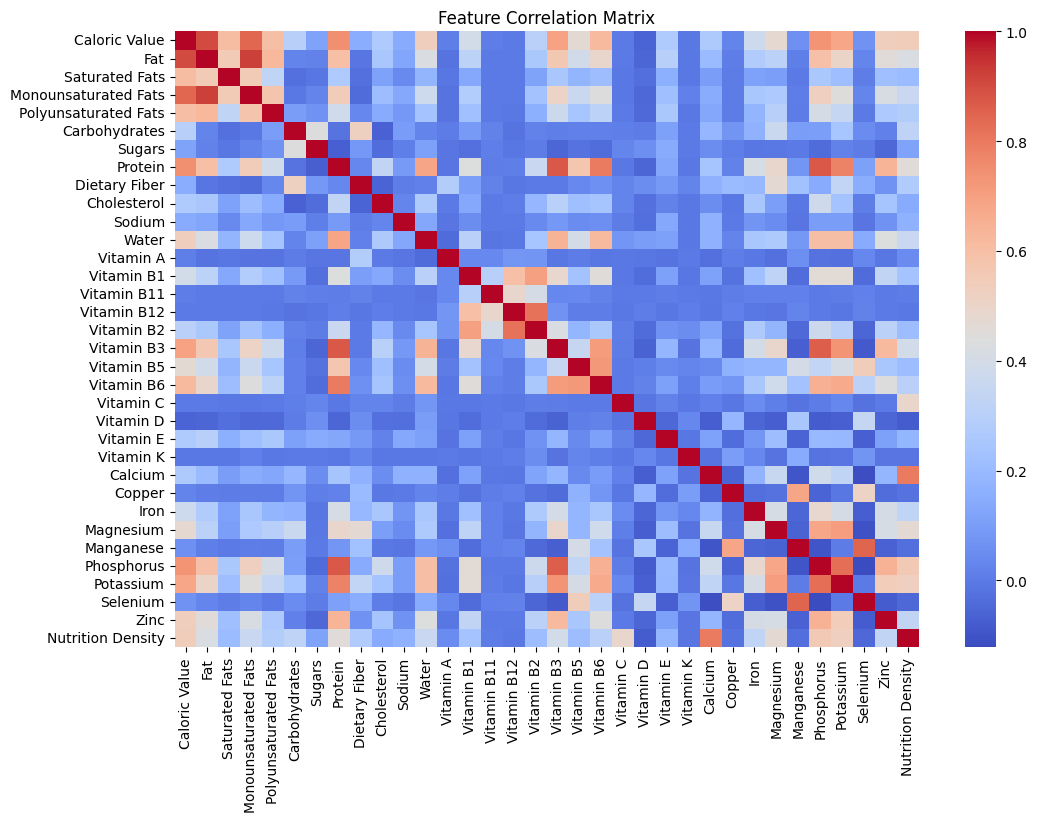

Highly Correlated Features (Threshold > 0.90): ['Fat', 'Monounsaturated Fats']


In [4]:
# Save 'food' column separately
food_column = df['food']
df = df.drop(columns=['food'])  # Drop 'food' for now

# Check correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)  # Set annot=True to see values
plt.title("Feature Correlation Matrix")
plt.show()

# Identify highly correlated features (threshold = 0.90)
correlation_matrix = df.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.90
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.90)]

print("Highly Correlated Features (Threshold > 0.90):", high_corr_features)


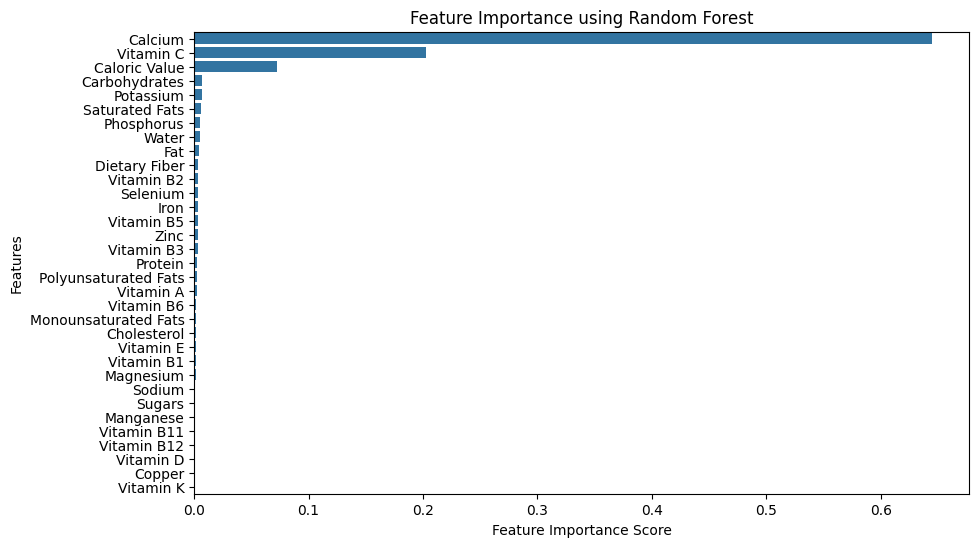

Top Features Based on Random Forest Importance:
 Calcium           0.644950
Vitamin C         0.202486
Caloric Value     0.072697
Carbohydrates     0.007028
Potassium         0.006426
Saturated Fats    0.005561
Phosphorus        0.005510
Water             0.005433
Fat               0.004095
Dietary Fiber     0.003691
dtype: float64


In [5]:
# Separate features (X) and target (y)
X = df.drop(columns=['Nutrition Density'])  # Drop target
y = df['Nutrition Density']

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Feature Importance using Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_scaled_df, y)

# Get Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using Random Forest")
plt.show()

# Display top important features
print("Top Features Based on Random Forest Importance:\n", feature_importances.head(10))


In [6]:
# Drop the highly correlated feature 'Monounsaturated Fats'
df = df.drop(columns=['Monounsaturated Fats'])

# Select the top 10 most important features
top_10_features = [
    'Calcium', 'Vitamin C', 'Caloric Value', 'Carbohydrates', 
    'Phosphorus', 'Saturated Fats', 'Potassium', 'Water', 
    'Vitamin B5', 'Dietary Fiber'
]

# Prepare final dataset with selected features
X_selected = df[top_10_features]
y = df['Nutrition Density']  # Target variable

# Standardize the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=top_10_features)

# Display the final feature set
print("Final Selected Features for Model Training:\n", X_scaled_df.head())

Final Selected Features for Model Training:
     Calcium  Vitamin C  Caloric Value  Carbohydrates  Phosphorus  \
0 -0.448970  -0.094866      -0.449163      -0.605069   -0.468640   
1  0.409392  -0.094914      -0.022799      -0.526838   -0.116859   
2 -0.449039  -0.094914      -0.454362      -0.601668   -0.468913   
3 -0.448202  -0.094842      -0.503758      -0.581259   -0.468841   
4 -0.257510  -0.094914      -0.503758      -0.591463   -0.400483   

   Saturated Fats  Potassium     Water  Vitamin B5  Dietary Fiber  
0       -0.052565  -0.489212 -0.650872   -0.279631      -0.413778  
1        0.357730  -0.296299 -0.258034   -0.141063      -0.413778  
2       -0.083337  -0.515511 -0.715775   -0.295715      -0.395271  
3       -0.134624  -0.463253 -0.590238   -0.290766      -0.413778  
4       -0.129495  -0.452564 -0.630376   -0.264785      -0.413778  


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train & Evaluate Models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R² Score": r2}

# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print(" Model Performance Comparison:\n", results_df)


 Model Performance Comparison:
                         MAE         RMSE  R² Score
Linear Regression  3.902165    89.817021  0.996319
Random Forest      9.793989  1328.547807  0.945553
XGBoost            9.994572  1189.530721  0.951250


In [9]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(LinearRegression(), X_scaled_df, y, cv=5, scoring='r2')
print(" Cross-Validation R² Scores:", cv_scores)
print(" Mean R² Score:", cv_scores.mean())

 Cross-Validation R² Scores: [0.99929396 0.98298103 0.98735928 0.99633794 0.99876959]
 Mean R² Score: 0.992948361583737


The cross-validation R² scores confirm that Linear Regression is the best choice

In [11]:
from sklearn.linear_model import LinearRegression

# Re-initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)  # Use the pre-split training data

# Get feature names
feature_names = X_scaled_df.columns

# Get regression coefficients
coefficients = lr_model.coef_

# Create a DataFrame for readability
coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

# Sort by absolute value for better understanding
coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="Abs_Coefficient", ascending=False).drop(columns=["Abs_Coefficient"])

# Display results
print("Regression Coefficients:\n", coef_df)


Regression Coefficients:
           Feature  Coefficient
0         Calcium   115.218632
1       Vitamin C    82.821510
2   Caloric Value    56.606776
5  Saturated Fats   -11.992227
9   Dietary Fiber    10.343887
4      Phosphorus    10.250819
3   Carbohydrates     9.929777
8      Vitamin B5     3.507290
6       Potassium    -1.498492
7           Water     1.296459


In [12]:
df

,Caloric Value,Fat,Saturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,Sodium,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,51,5000,2900,200,800,500,900,0,14.6,0.016,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,215,19400,10900,800,3100,2700,7800,0,62.9,0.300,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,49,3600,2300,0,900,3400,800,100,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,30,2000,1300,2,1500,91,1500,0,9.8,0.017,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,30,2300,1400,42,1200,900,1200,0,8.1,0.046,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,25,95,0,0,6700,0,500,0,0.0,0.027,...,15.800,0.400,0.600,24.800,0.040,13.900,42.6,0.034,0.700,24.249
2391,1,99,27,10,200,34,62,89,0.0,0.084,...,0.000,0.000,0.099,0.034,0.500,0.015,3.2,10.800,0.096,0.433
2392,4,70,56,7,700,96,400,400,0.0,0.080,...,0.000,5.500,0.056,1.600,2.500,0.060,25.0,53.000,0.069,1.727
2393,19,300,36,100,3300,2200,1800,1100,0.0,0.014,...,2.600,0.200,0.300,0.000,0.092,92.900,313.0,0.015,0.500,9.400


In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

path = 'clean_data_with_same_units.csv'
df1 = pd.read_csv(path, index_col=0)
# Extract food names and target variable
food_names = df1["food"]
y = df1["Nutrition Density"]

# Apply TF-IDF with bigrams & trigrams (to capture word combinations)
vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=500)  # Consider 1-word, 2-word, and 3-word phrases
food_vectors = vectorizer.fit_transform(food_names).toarray()

# Convert to DataFrame
food_df = pd.DataFrame(food_vectors, columns=vectorizer.get_feature_names_out())

# Display transformed food name features
print(food_df.head())

   acorn  almond  almonds  amaranth  american  and  apple  apple juice  \
0    0.0     0.0      0.0       0.0       0.0  0.0    0.0          0.0   
1    0.0     0.0      0.0       0.0       0.0  0.0    0.0          0.0   
2    0.0     0.0      0.0       0.0       0.0  0.0    0.0          0.0   
3    0.0     0.0      0.0       0.0       0.0  0.0    0.0          0.0   
4    0.0     0.0      0.0       0.0       0.0  0.0    0.0          0.0   

   apricot  arroz  ...  with chocolate  with egg  with ham  yam  yellow  \
0      0.0    0.0  ...             0.0       0.0       0.0  0.0     0.0   
1      0.0    0.0  ...             0.0       0.0       0.0  0.0     0.0   
2      0.0    0.0  ...             0.0       0.0       0.0  0.0     0.0   
3      0.0    0.0  ...             0.0       0.0       0.0  0.0     0.0   
4      0.0    0.0  ...             0.0       0.0       0.0  0.0     0.0   

   yellow cake  yellow snap  yellow snap beans  yogurt  zucchini  
0          0.0          0.0          

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(food_df, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Extract the coefficients (importance of each word)
coef_df = pd.DataFrame({"Word": vectorizer.get_feature_names_out(), "Coefficient": lr_model.coef_})

# Sort by importance
coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="Abs_Coefficient", ascending=False).drop(columns=["Abs_Coefficient"])

# Display the most important words affecting Nutrition Density
print("Most Important Words Affecting Nutrition Density:\n", coef_df.head(20))


Most Important Words Affecting Nutrition Density:
                      Word  Coefficient
449                   top  2057.549587
450              top loin -1864.818831
379         salmon canned  1612.304738
243                  loin  1398.751924
246              loin raw -1320.631238
245           loin cooked -1294.923347
29               beef top -1277.720335
458         turkey breast   957.842634
146  dressing reduced fat  -911.851246
84                 cherry   899.520274
244            loin chops  -869.508449
127          cream cheese  -680.288100
26              beans raw   664.370448
165              fat free   613.572112
359               reduced   515.319000
360           reduced fat   515.319000
349                 queso   503.964300
375       salad mcdonalds   495.625135
490        with chocolate   468.650508
295              oriental   468.499752


/var/folders/76/kd3lw_3d1wd7hlk0x0zpht9h0000gn/T/ipykernel_2856/481170775.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_df["Coefficient"][:20], y=coef_df["Word"][:20], palette="coolwarm")


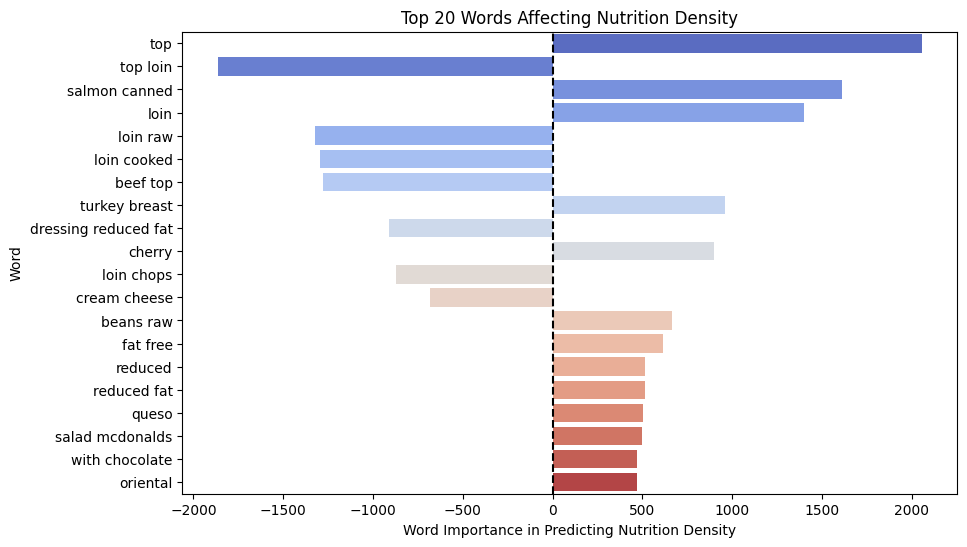

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=coef_df["Coefficient"][:20], y=coef_df["Word"][:20], palette="coolwarm")
plt.xlabel("Word Importance in Predicting Nutrition Density")
plt.ylabel("Word")
plt.title("Top 20 Words Affecting Nutrition Density")
plt.axvline(x=0, color='black', linestyle='--')  # Reference line at 0
plt.show()


## Final Model

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

path = 'clean_data_with_same_units.csv'
df = pd.read_csv(path, index_col=0)

# Extract food names and target variable
food_names = df["food"]
y = df["Nutrition Density"]

# Apply TF-IDF with bigrams & trigrams (captures word combinations)
vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=500)  
food_vectors = vectorizer.fit_transform(food_names).toarray()

# Convert to DataFrame
food_df = pd.DataFrame(food_vectors, columns=vectorizer.get_feature_names_out())

# Save vectorizer for future use (for new predictions)
import pickle
pickle.dump(vectorizer, open("tfidf_vectorizer.pkl", "wb"))

# Show transformed food name features
print(food_df.head())

   acorn  almond  almonds  amaranth  american  and  apple  apple juice  \
0    0.0     0.0      0.0       0.0       0.0  0.0    0.0          0.0   
1    0.0     0.0      0.0       0.0       0.0  0.0    0.0          0.0   
2    0.0     0.0      0.0       0.0       0.0  0.0    0.0          0.0   
3    0.0     0.0      0.0       0.0       0.0  0.0    0.0          0.0   
4    0.0     0.0      0.0       0.0       0.0  0.0    0.0          0.0   

   apricot  arroz  ...  with chocolate  with egg  with ham  yam  yellow  \
0      0.0    0.0  ...             0.0       0.0       0.0  0.0     0.0   
1      0.0    0.0  ...             0.0       0.0       0.0  0.0     0.0   
2      0.0    0.0  ...             0.0       0.0       0.0  0.0     0.0   
3      0.0    0.0  ...             0.0       0.0       0.0  0.0     0.0   
4      0.0    0.0  ...             0.0       0.0       0.0  0.0     0.0   

   yellow cake  yellow snap  yellow snap beans  yogurt  zucchini  
0          0.0          0.0          

In [29]:
# Select top 10 numeric features (from previous analysis)
top_10_features = [
    'Calcium', 'Vitamin C', 'Caloric Value', 'Carbohydrates', 
    'Phosphorus', 'Saturated Fats', 'Potassium', 'Water', 
    'Vitamin B5', 'Dietary Fiber'
]

# Extract numeric features & scale them
X_numeric = df[top_10_features]
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Convert back to DataFrame
X_numeric_df = pd.DataFrame(X_numeric_scaled, columns=top_10_features)

# Save scaler for future use
pickle.dump(scaler, open("scaler.pkl", "wb"))

# Merge text (food name) features with numeric features
X_final = pd.concat([X_numeric_df, food_df], axis=1)

print(f"Final dataset shape: {X_final.shape}")  # Check combined feature dimensions


Final dataset shape: (2395, 510)


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train Random Forest Model
final_model = RandomForestRegressor(n_estimators=200, random_state=42)
final_model.fit(X_train, y_train)

# Save trained model
pickle.dump(final_model, open("nutrition_density_model.pkl", "wb"))

# Predict on test set
y_pred = final_model.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)

# Print Results
print(f" Final Model Performance:")
print(f" MAE: {mae:.4f}")
print(f" RMSE: {rmse:.4f}")
print(f" R² Score: {r2:.4f}")


 Final Model Performance:
 MAE: 10.2458
 RMSE: 1402.4203
 R² Score: 0.9425


In [37]:
def predict_nutrition_density(food_name):
    # Load saved models
    vectorizer = pickle.load(open("tfidf_vectorizer.pkl", "rb"))
    scaler = pickle.load(open("scaler.pkl", "rb"))
    model = pickle.load(open("nutrition_density_model.pkl", "rb"))
    
    # Convert food name into a TF-IDF vector
    food_vector = vectorizer.transform([food_name]).toarray()
    food_df = pd.DataFrame(food_vector, columns=vectorizer.get_feature_names_out())

    # Create an empty numeric feature set (since we don't have nutrition data for new food)
    numeric_input = pd.DataFrame([[0] * len(top_10_features)], columns=top_10_features)

    # Merge food vector with numeric input
    X_input = pd.concat([numeric_input, food_df], axis=1)

    # Predict Nutrition Density
    prediction = model.predict(X_input)

    return prediction[0]

In [59]:
# Example Usage:
food_name = "Club soda"
predicted_density = predict_nutrition_density(food_name)
print(f"Predicted Nutrition Density for '{food_name}': {predicted_density:.2f}")

Predicted Nutrition Density for 'Club soda': 100.21


In [63]:
from gensim.models import Word2Vec
import numpy as np

# Tokenize food names
food_tokens = [food.split() for food in df["food"]]  

# Train Word2Vec model
w2v_model = Word2Vec(sentences=food_tokens, vector_size=100, window=5, min_count=1, workers=4)

# Convert each food name to an average word vector
def get_word2vec_embedding(food_name):
    words = food_name.split()
    vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

# Apply to dataset
food_vectors = np.array([get_word2vec_embedding(food) for food in df["food"]])
food_df = pd.DataFrame(food_vectors)

# Merge with numeric features
X_final = pd.concat([X_numeric_df, food_df], axis=1)


In [68]:
from sklearn.ensemble import RandomForestRegressor

# Train a model to predict each numeric feature using food embeddings
feature_models = {}
for feature in top_10_features:
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(food_df, df[feature])  
    feature_models[feature] = model  # Store the trained model

# Function to predict missing numeric values
def estimate_numeric_features(food_name):
    food_vec = get_word2vec_embedding(food_name).reshape(1, -1)
    estimates = {feature: feature_models[feature].predict(food_vec)[0] for feature in top_10_features}
    return pd.DataFrame([estimates])

In [69]:
# Predict missing features for "Club Soda"
estimated_features = estimate_numeric_features("Club soda")
print(estimated_features)


    Calcium  Vitamin C  Caloric Value  Carbohydrates  Phosphorus  \
0  84.70399   20.33248         262.79        43111.0   184.93917   

   Saturated Fats  Potassium     Water  Vitamin B5  Dietary Fiber  
0         4363.35    381.217  197069.7     0.69947         5789.1  


In [79]:
def predict_nutrition_density(food_name):
    # Load models
    vectorizer = pickle.load(open("tfidf_vectorizer.pkl", "rb"))  # Ensure this is the same vectorizer
    model = pickle.load(open("nutrition_density_model.pkl", "rb"))

    # Convert food name into a TF-IDF vector (using the trained vocabulary)
    food_vector = vectorizer.transform([food_name]).toarray()

    # Convert to DataFrame with **correct feature names**
    food_df = pd.DataFrame(food_vector, columns=vectorizer.get_feature_names_out())

    # Ensure that all missing features from training are set to 0
    expected_features = model.feature_names_in_  # Features used in training
    for col in expected_features:
        if col not in food_df.columns:
            food_df[col] = 0  # Add missing columns with zero values

    # Reorder columns to match the training feature order
    food_df = food_df[expected_features]

    # Estimate numeric features for the food
    estimated_features = estimate_numeric_features(food_name)

    # Merge estimated numeric features with NLP features
    X_input = pd.concat([estimated_features, food_df], axis=1)

    # Ensure column order is the same as training
    X_input = X_input[expected_features]

    # Predict Nutrition Density
    prediction = model.predict(X_input)
    return prediction[0]


In [81]:
# Test again
food_name = "Club soda"
predicted_density = predict_nutrition_density(food_name)
print(f"Corrected Predicted Nutrition Density for '{food_name}': {predicted_density:.4f}")


ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.
